# Session 4: Convolutional Neural Networks and Filters

This notebook contains structured tasks based on Session 4 materials.

**Instructions:**
- Do NOT use a separate `.py` file. Complete all tasks directly in this notebook.
- Keep your code clear and well-commented.
- For Visulaization, please use `%matplotlib inline`
- Submit your completed notebook by uploading it to your forked repository.

### ***DO NOT UPLOAD THE DATASET TO GITHUB as it's too large***
<hr>

## Task 1: Convolutional Filters on an Image
Apply several 2D filters (Sobel X, Sobel Y, Laplacian, and Sharpen) to an image and visualize the results side by side.

**Hint:**
- Use OpenCV (`cv2.filter2D`) or NumPy to apply kernels.
- Define common kernels (Sobel, Laplacian, Sharpen).
- Use `matplotlib.pyplot` to plot the original and filtered images.

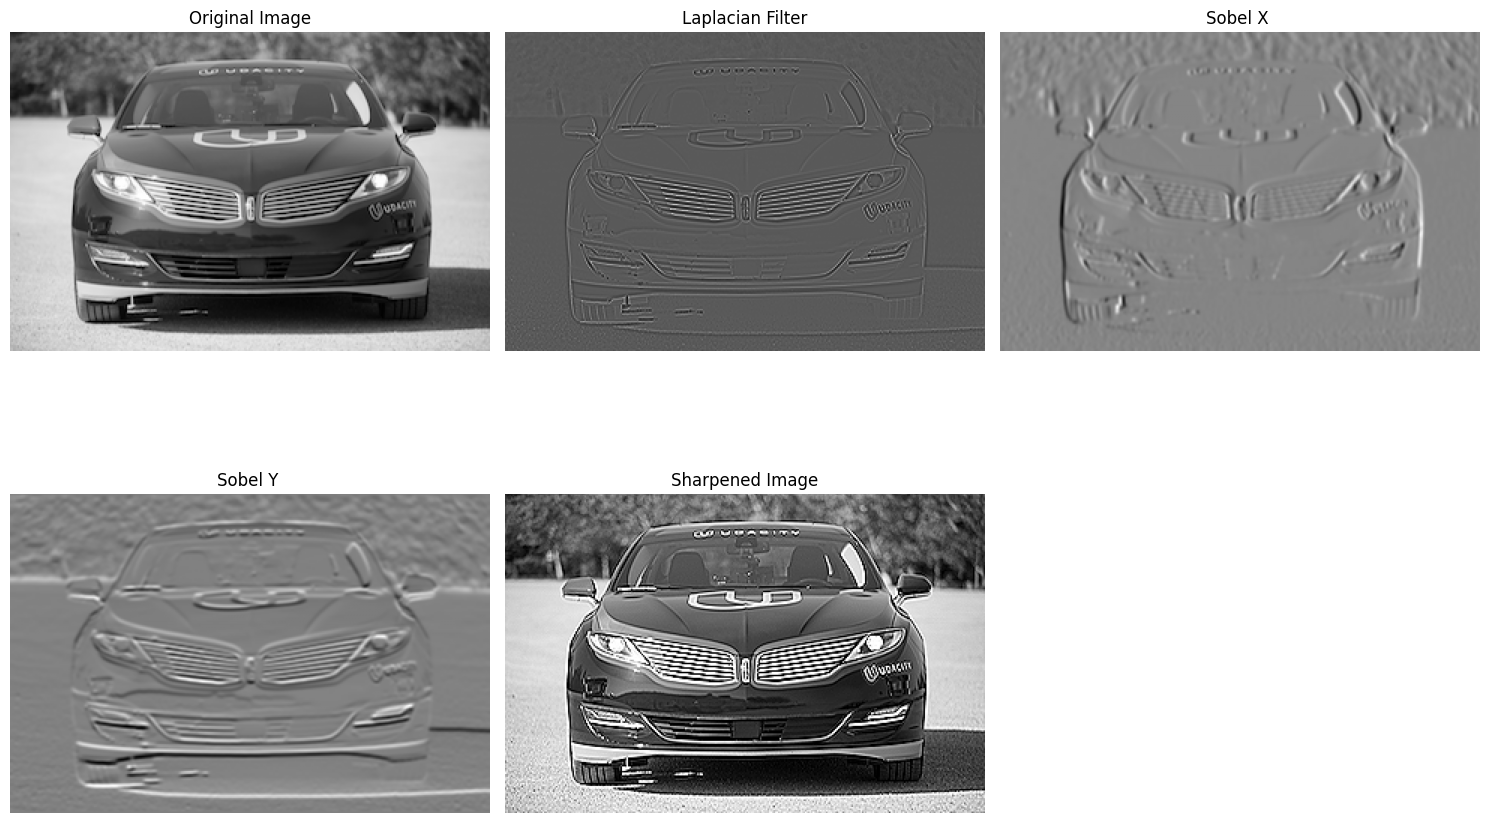

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# TODO: Load an image (use OpenCV or matplotlib)
img = cv2.imread(r'C:\Users\OPT\OneDrive\Desktop\sky\Session4\CNN_Layers\images\udacity_sdc.png')  
# TODO: Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# TODO: Define Sobel, Laplacian, and Sharpen kernels
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)

sharpen_filter = np.array([[0,-1, 0], 
                          [-1, 5,-1],
                          [0,-1, 0]])

# TODO: Apply each filter to the image
laplacian_img = cv2.filter2D(img_gray, -1, laplacian)
sobel_img_x = cv2.filter2D(img_gray, -1, sobelx)
sobel_img_y = cv2.filter2D(img_gray, -1, sobely)

sharpened_img = cv2.filter2D(img_gray, -1, sharpen_filter)

# TODO: Plot results in a grid using matplotlib

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X ')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y ')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.tight_layout()
plt.show()


## Task 2: Build a Simple CNN on FashionMNIST
Construct and train a small Convolutional Neural Network (CNN) on the FashionMNIST dataset.

**Hint:**
- Use `torchvision.datasets.FashionMNIST` for loading data.
- Define a small CNN with `nn.Conv2d`, `nn.ReLU`, `nn.MaxPool2d`, and `nn.Linear`.
- Train for a few epochs using an optimizer (e.g., Adam) and loss function (e.g., CrossEntropyLoss).
- Print training accuracy after each epoch.

In [6]:
# TODO: Import torch, torchvision, and related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

# TODO: Load FashionMNIST dataset with transforms
data_transform = transforms.ToTensor()
train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=data_transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=data_transform)

batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# TODO: Define a simple CNN class with one conv layer and one fc layer
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 3)
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(10*13*13, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)

        return x
simpleCNN = SimpleCNN()
print(SimpleCNN)

# TODO: Set up optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(simpleCNN.parameters(), lr=0.001)

# TODO: Implement a short training loop (2-3 epochs)
def train(n_epochs):
    
    loss_over_time = [] 
    running_loss = 0.0
    correct = 0
    total = 0
    
    for epoch in range(n_epochs):  
        
        for batch_i, data in enumerate(train_loader):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = simpleCNN(inputs)

            loss = criterion(outputs, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            if batch_i % 1000 == 999:    
                avg_loss = running_loss/1000
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, avg_loss))
                running_loss = 0.0

        epoch_accuracy = 100 * correct / total
        print('Epoch {} - Training Accuracy: {:.2f}%'.format(epoch + 1, epoch_accuracy))
        print('-' * 50)
        
    print('Finished Training')
    return loss_over_time
n_epochs = 3
training_loss = train(n_epochs)




<class '__main__.SimpleCNN'>
Epoch: 1, Batch: 1000, Avg. Loss: 0.6052520537227393
Epoch: 1, Batch: 2000, Avg. Loss: 0.4231661471799016
Epoch: 1, Batch: 3000, Avg. Loss: 0.3704296157285571
Epoch 1 - Training Accuracy: 83.50%
--------------------------------------------------
Epoch: 2, Batch: 1000, Avg. Loss: 0.3528751817755401
Epoch: 2, Batch: 2000, Avg. Loss: 0.3289231061823666
Epoch: 2, Batch: 3000, Avg. Loss: 0.32066323585808276
Epoch 2 - Training Accuracy: 85.89%
--------------------------------------------------
Epoch: 3, Batch: 1000, Avg. Loss: 0.3066343605089933
Epoch: 3, Batch: 2000, Avg. Loss: 0.293463484197855
Epoch: 3, Batch: 3000, Avg. Loss: 0.29439119950868187
Epoch 3 - Training Accuracy: 87.05%
--------------------------------------------------
Finished Training


## Task 3: Visualize Feature Maps
Visualize feature maps produced by the first convolutional layer of your CNN.

**Hint:**
- Take a single image from the test set.
- Pass it through the first convolutional layer (`net.conv1`).
- Convert the output to NumPy and plot several channels as images.

Test image - True label: Ankle boot


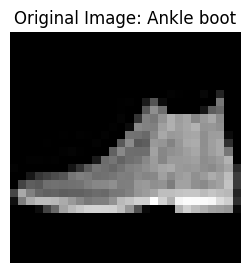

Feature maps shape: (10, 26, 26)


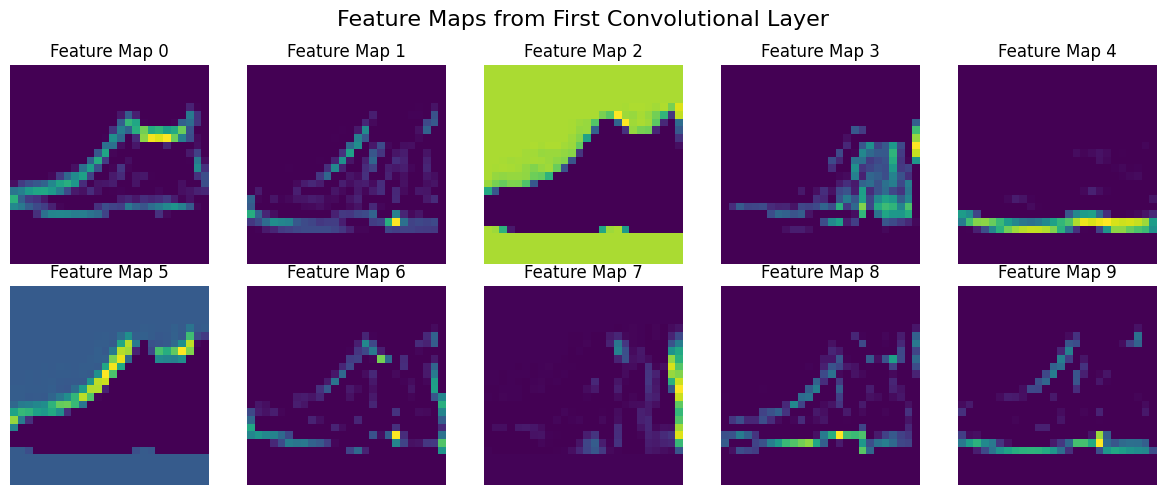

In [10]:
# TODO: Take one test image
dataiter = iter(test_loader)
images, labels = next(dataiter)
single_image = images[0:1]  # Take first image, keep batch dimension
true_label = labels[0].item()

print(f"Test image - True label: {classes[true_label]}")

# Display the original image
plt.figure(figsize=(3, 3))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f'Original Image: {classes[true_label]}')
plt.axis('off')
plt.show()
# TODO: Forward pass through the first convolutional layer
with torch.no_grad():
    # Pass through conv1 and ReLU (but not pooling)
    feature_maps = F.relu(simpleCNN.conv1(single_image))
# TODO: Convert feature maps to NumPy array
feature_maps_np = feature_maps.squeeze().numpy()  # Shape: (10, 26, 26)

print(f"Feature maps shape: {feature_maps_np.shape}")

# TODO: Plot the first few feature maps in a grid
num_maps = feature_maps_np.shape[0]  # Should be 10

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Feature Maps from First Convolutional Layer', fontsize=16)

for i in range(num_maps):
    row = i // 5
    col = i % 5
    
    ax = axes[row, col]
    ax.imshow(feature_maps_np[i], cmap='viridis')
    ax.set_title(f'Feature Map {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Task 4: Haar Cascade Face Detection

Apply Haar Cascade classifiers for basic object detection (faces).

**Hint:**
- Use `cv2.CascadeClassifier` with a pre-trained XML file (e.g., `haarcascade_frontalface_default.xml`).
- Convert the input image to grayscale before detection.
- Use `detectMultiScale` to get bounding boxes.
- Draw rectangles on detected faces with `cv2.rectangle`.
- Visualize with Matplotlib.


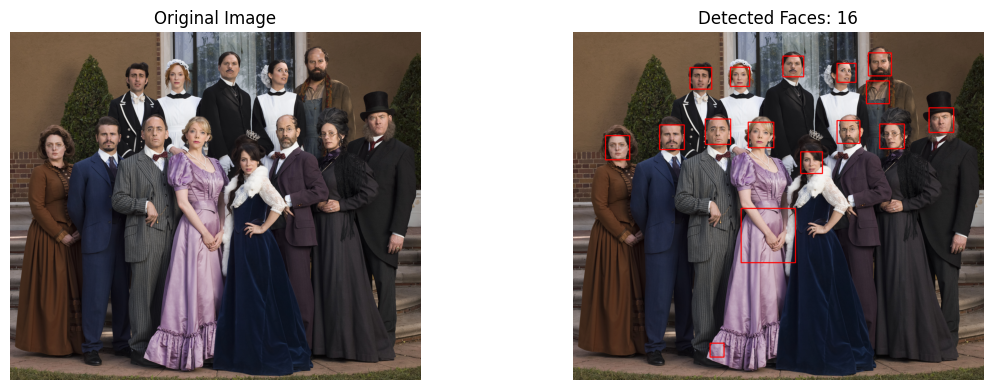

Number of faces detected: 16


In [19]:
# TODO: Load an image containing a face
image = cv2.imread(r"C:\Users\OPT\OneDrive\Desktop\sky\Session4\Convolutional_Filters_Edge_Detection\images\multi_faces.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# TODO: Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# TODO: Load Haar Cascade XML (frontal face) || cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
xml = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + xml)
# TODO: Apply detectMultiScale to find faces
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
# TODO: Draw bounding boxes on the original image
result_image = image_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(result_image, (x, y), (x + w, y + h), (255, 0, 0), 3)
# TODO: Display results with matplotlib
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
    
plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title(f'Detected Faces: {len(faces)}')
plt.axis('off')
    
plt.tight_layout()
plt.show()
    
print(f"Number of faces detected: {len(faces)}")        
    